# 2 Data Wrangling

## Table of Contents:

* [2.1 Introduction](#2.1_Introduction)
* [2.2 Import Packages](#2.2_Import_Packages)
* [2.3 Load Data](#2.3_Load_Data)
* [2.4 Exploring the Data](#2.4_Exploring_the_Data)
* [2.5 Looking at Outliers](#2.5_Looking_at_Outliers)
* [2.6 Summary and Next Steps](#2.6_Summary_and_Next_Steps)

## 2.1 Introduction<a id='2.1_Introduction'></a>

__Purpose:__

Predicting company bankruptcy is critical in any financial institution, especially those involved in lending. For such companies, being able to predict whether a business will succeed or fail can result in successful business loans that grow companies, create jobs, and bolster the economy; or result in millions of dollars in losses.

I am interested in developing a binary classification model to predict whether a business is at risk for bankruptcy, what factors contribute to its risk for bankruptcy, and by how much do those factors play a role. Here, we will use a dataset from the Taiwan Economic Journal. What we know about the dataset from the description:
* The data is historical data from 1999 to 2009, collected from the Taiwan Economic Journal. 
* The data is imbalanced, with ~3.2% bankruptcies and ~96.8% non-bankruptcies.

The data is downloaded from kaggle:
“Company Bankruptcy Prediction: Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009”: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction



__Objective:__ 

We will clean the dataset and address issues like missing values, duplicate values, and outliers. We also want to inspect and understand the data. 

At the end of this notebook, we want to have generated a CSV file with the data that is ready for downsampling and upsampling techniques like SMOTE.

## 2.2 Import Packages<a id='2.2_Import_Packages'></a>

In [64]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime

## 2.3 Load Data<a id='2.3_Load_Data'></a>

In [65]:
# change directories to where the raw data is located.

# path = 'data'
# os.chdir(path)
# os.getcwd()
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## 2.4 Exploring the Data<a id='2.4_Exploring_the_Data'></a>

In [66]:
#Let's see how many bankrupt companies we have.

bankrupt = data['Bankrupt?'].sum()
total = data.shape[0]
not_bankrupt = total - bankrupt

print('Number of bankrupt companies:', bankrupt, ',', round(bankrupt/total*100, 2),'% of dataset.')
print('Number of not-bankrupt companies:', not_bankrupt, ',', round(not_bankrupt/total*100, 2),'% of dataset.')
print('Total number of companies:', total)


Number of bankrupt companies: 220 , 3.23 % of dataset.
Number of not-bankrupt companies: 6599 , 96.77 % of dataset.
Total number of companies: 6819


Only 3.23% of our dataset are of bankrupt companies. This is a small minority class! In the next notebook, we will look into various methods of upsampling our minority class and downsampling our majority class. For now, we will work on ensuring the data is clean and ready for processing.

In [67]:
#Let's take a look at the data, and see if there are any null values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

From a quick glance at the .head() and .info() results, there does not appear to be any Null values in the data. Furthermore, everything is numerical (float and int, not "object" datatypes), making it very easy to work with. This does not necessarily mean that there are no Null values, they may be recorded as "-1" or "0" or some other unusual number. So we should still check for that.

We also note that columns 0, 85, and 94 are type int64. This indicates they are binary classes. This makes sense: 
* Column 0 is our predicted variable, "Bankrupt?", where 1 is bankruptcy and 0 is non-bankruptcy. 
* Column 85 is "Liability-Assets Flag", where 1 is flagged (presumably because there is some liability) and 0 is not flagged.
* Column 94 is "Net Income Flag", where 1 is flagged or 0 is not flagged.

Finally, we also see that there is some preceding whitespace in the column names. We should get rid of that.

In [68]:
# Get rid of preceding and trailing whitespace.

# Make a dictionary to map the old column name to the new column name
column_mapper = {}

for i in range(data.shape[1]):
    column_mapper[data.columns[i]] = data.columns[i].strip()

# Rename the columns
data = data.rename(columns=column_mapper)

#Check if there are trailing whitespaces
data.columns

#Great, looks like we got rid of the whitespaces!

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [69]:
# Now let's find unique values of each of our columns, and see if there are any that may correspond to null values.
#We'll use df.describe(), but let's also see how many unique values are in each column.

unique = [] #make an empty list
for i in data.columns:
    unique.append(data[i].nunique())

describe = data.describe().T #save df.descrbe() as a dataframe
describe['unique'] = unique #add 

#suppress scientific notation to make the df easier to read. We'll reset this later.
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#If we view all 96 columns, we get a truncated version. Instead, we'll split it into 2-halves.
#first half:
describe[:50]

,count,mean,std,min,25%,50%,75%,max,unique
Bankrupt?,6819.00,0.03,0.18,0.00,0.00,0.00,0.00,1.00,2
ROA(C) before interest and depreciation before interest,6819.00,0.51,0.06,0.00,0.48,0.50,0.54,1.00,3333
ROA(A) before interest and % after tax,6819.00,0.56,0.07,0.00,0.54,0.56,0.59,1.00,3151
ROA(B) before interest and depreciation after tax,6819.00,0.55,0.06,0.00,0.53,0.55,0.58,1.00,3160
Operating Gross Margin,6819.00,0.61,0.02,0.00,0.60,0.61,0.61,1.00,3781
Realized Sales Gross Margin,6819.00,0.61,0.02,0.00,0.60,0.61,0.61,1.00,3788
Operating Profit Rate,6819.00,1.00,0.01,0.00,1.00,1.00,1.00,1.00,3376
Pre-tax net Interest Rate,6819.00,0.80,0.01,0.00,0.80,0.80,0.80,1.00,3789
After-tax net Interest Rate,6819.00,0.81,0.01,0.00,0.81,0.81,0.81,1.00,3604
Non-industry income and expenditure/revenue,6819.00,0.30,0.01,0.00,0.30,0.30,0.30,1.00,2551


In [70]:
#second half:
describe[50:]

,count,mean,std,min,25%,50%,75%,max,unique
Net Worth Turnover Rate (times),6819.00,0.04,0.04,0.00,0.02,0.03,0.04,1.00,741
Revenue per person,6819.00,2325854.27,136632654.39,0.00,0.01,0.02,0.04,8810000000.00,5667
Operating profit per person,6819.00,0.40,0.03,0.00,0.39,0.40,0.40,1.00,3023
Allocation rate per person,6819.00,11255785.32,294506294.12,0.00,0.00,0.01,0.02,9570000000.00,6768
Working Capital to Total Assets,6819.00,0.81,0.06,0.00,0.77,0.81,0.85,1.00,6819
Quick Assets/Total Assets,6819.00,0.40,0.20,0.00,0.24,0.39,0.54,1.00,6819
Current Assets/Total Assets,6819.00,0.52,0.22,0.00,0.35,0.51,0.69,1.00,6819
Cash/Total Assets,6819.00,0.12,0.14,0.00,0.03,0.07,0.16,1.00,6819
Quick Assets/Current Liability,6819.00,3592902.20,171620908.61,0.00,0.01,0.01,0.01,8820000000.00,6819
Cash/Current Liability,6819.00,37159994.15,510350903.16,0.00,0.00,0.00,0.01,9650000000.00,6816


In [71]:
#We notice that some of the features have a max that's in the trillions, but a 75th percentile that's less than 1.
#Let's see which features these are.

describe[(describe['75%'] < 1) & (describe['max'] > 1)]

,count,mean,std,min,25%,50%,75%,max,unique
Interest-bearing debt interest rate,6819.00,16448012.91,108275033.53,0.00,0.00,0.00,0.00,990000000.00,1080
Revenue Per Share (Yuan ¥),6819.00,1328640.60,51707089.77,0.00,0.02,0.03,0.05,3020000000.00,3807
Net Value Growth Rate,6819.00,1566212.06,114159389.52,0.00,0.00,0.00,0.00,9330000000.00,4502
Current Ratio,6819.00,403284.95,33302155.83,0.00,0.01,0.01,0.02,2750000000.00,6132
Quick Ratio,6819.00,8376594.82,244684748.45,0.00,0.00,0.01,0.01,9230000000.00,6094
Total debt/Total net worth,6819.00,4416336.71,168406905.28,0.00,0.00,0.01,0.01,9940000000.00,5518
Accounts Receivable Turnover,6819.00,12789705.24,278259836.98,0.00,0.00,0.00,0.00,9740000000.00,1593
Average Collection Days,6819.00,9826220.86,256358895.71,0.00,0.00,0.01,0.01,9730000000.00,5451
Fixed Assets Turnover Frequency,6819.00,1008595981.82,2477557316.92,0.00,0.00,0.00,0.00,9990000000.00,2451
Revenue per person,6819.00,2325854.27,136632654.39,0.00,0.01,0.02,0.04,8810000000.00,5667


In [72]:
# What are the names of these features, where 75th percentil is <1 but max is in the trillions?
describe[(describe['75%'] < 1) & (describe['max'] > 1)].index

Index(['Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)',
       'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio',
       'Total debt/Total net worth', 'Accounts Receivable Turnover',
       'Average Collection Days', 'Fixed Assets Turnover Frequency',
       'Revenue per person', 'Allocation rate per person',
       'Quick Assets/Current Liability', 'Cash/Current Liability',
       'Inventory/Current Liability', 'Long-term Liability to Current Assets',
       'Current Asset Turnover Rate', 'Fixed Assets to Assets',
       'Total assets to GNP price'],
      dtype='object')

From the df.describe() dataframes above, we note the following:

* Aside from "Net Income Flag", all features have a minimum of 0. "Net Income Flag" only has 1 unique value. If all companies have the same value for "Net Income Flag", then it's not useful in predicting whether a company goes bankrupt. We should remove this column from our features.


* Many features have a maximum of 1. This is mostly because they are ratios. The 24 features without a maximum of 1 are:

    * Operating Expense Rate
    * Research and development expense rate
    * Interest-bearing debt interest rate
    * Revenue Per Share (Yuan ¥)
    * Total Asset Growth Rate	
    * Net Value Growth Rate
    * Current Ratio
    * Quick Ratio
    * Total debt/Total net worth
    * Accounts Receivable Turnover
    * Average Collection Days
    * Inventory Turnover Rate (times)	
    * Fixed Assets Turnover Frequency
    * Revenue per person
    * Allocation rate per person
    * Quick Assets/Current Liability
    * Cash/Current Liability
    * Inventory/Current Liability
    * Long-term Liability to Current Assets
    * Current Asset Turnover Rate
    * Quick Asset Turnover Rate
    * Cash Turnover Rate
    * Fixed Assets to Assets	
    * Total assets to GNP price
    
    
* Of these, the following 18 features have a 75th percentile less than 1, but a maximum that is in the trillions:

    * Interest-bearing debt interest rate
    * Revenue Per Share (Yuan ¥)
    * Net Value Growth Rate
    * Current Ratio
    * Quick Ratio
    * Total debt/Total net worth
    * Accounts Receivable Turnover
    * Average Collection Days
    * Fixed Assets Turnover Frequency
    * Revenue per person
    * Allocation rate per person
    * Quick Assets/Current Liability
    * Cash/Current Liability
    * Inventory/Current Liability
    * Long-term Liability to Current Assets
    * Current Asset Turnover Rate
    * Fixed Assets to Assets
    * Total assets to GNP price
    
We should look into the distribution of the values in the last list. If there are huge outliers, we may want to remove them. This is because we may want a classifier that can function well on boundary cases, and having several huge outliers may obscure the fine differences in the smaller values.

## 2.5 Looking at Outliers<a id='2.5_Looking_at_Outliers'></a> 

In [73]:
#First, remove the "Net Income Flag" column
print('Number of columns prior to dropping:', data.shape[1])
data = data.drop(columns = ['Net Income Flag'])
print('Number of columns after dropping:', data.shape[1])

Number of columns prior to dropping: 96
Number of columns after dropping: 95


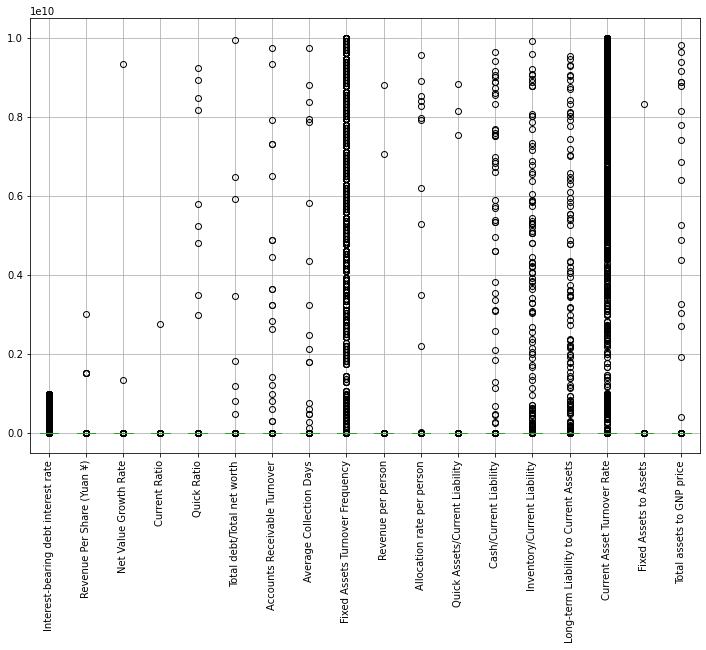

In [74]:
#Second, let's look into the distribution of the values in the list (where 75th percentile < 1, but max >1)

maybe_outliers = list(describe[(describe['75%'] < 1) & (describe['max'] > 1)].index) #make a list of column names

df = data[maybe_outliers]

plt.subplots(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation='vertical');

Let's take a look at our boxplot. Remember that these columns all have a 75th percentile < 1, so every single point we see plotted here is considered an outlier. We want to identify columns that may have a just one or two suspiciously large outliers, while keeping the columns that have a more broad distribution.

From the looks of it, most of these columns have a fairly broad distribution. The ones that have what appear to be 3 or fewer outliers are the following 6 columns:
* Revenue Per Share (Yuan ¥)
* Net Value Growth Rate
* Current Ratio
* Revenue per person
* Quick Assets/Current Liability
* Fixed Assets to Assets

Let's see which companies these are, and whether there is a particular company that is contributing to all of these outliers.

In [91]:
#Make a list of the 6 columns of interest, plus our predictive variable "Bankrupt?". 
maybe_outlier2 = ['Revenue Per Share (Yuan ¥)', 'Net Value Growth Rate', 'Current Ratio', \
                  'Revenue per person', 'Quick Assets/Current Liability', 'Fixed Assets to Assets', \
                  'Bankrupt?']


data[(data[maybe_outlier2[0]] >1) | (data[maybe_outlier2[1]] >1) | (data[maybe_outlier2[2]] >1) | \
    (data[maybe_outlier2[3]] >1) | (data[maybe_outlier2[4]] >1) | (data[maybe_outlier2[5]] >1)][maybe_outlier2]

,Revenue Per Share (Yuan ¥),Net Value Growth Rate,Current Ratio,Revenue per person,Quick Assets/Current Liability,Fixed Assets to Assets,Bankrupt?
379,0.00,0.00,0.00,7050000000.00,0.00,0.31,1
2063,0.02,0.00,0.01,0.16,8140000000.00,0.08,0
2168,0.01,0.00,0.01,0.11,8820000000.00,0.03,0
2344,0.00,0.00,0.01,0.01,0.00,8320000000.00,1
2345,1510000000.00,0.00,0.59,0.00,0.27,0.00,0
2363,1510000000.00,0.00,0.01,0.00,0.01,0.13,0
2393,3020000000.00,0.00,0.71,0.00,0.33,0.00,0
2411,1510000000.00,0.00,0.01,0.00,0.01,0.13,0
2470,0.02,9330000000.00,0.00,0.02,0.00,0.65,1
2499,0.00,0.00,2750000000.00,0.05,0.00,0.06,0


It looks like there are 12 companies contributing to the aforementioned outliers. Notice that 3 of these 12 companies have gone bankrupt. This may indicate that some of these outliers (corresponding to possible odd business practice) may contribute to the business failing.

Since this information may play an important role in determining whether a company may go bankrupt, we should keep the data. Another reason why we should keep these outliers is because, as we can see from the earlier boxplot, many companies have values that are considered outliers.

In [110]:
# How many companies exactly have outliers?

# To answer this question, technically we can calculate the Q1 and Q3 values, calculate the IQR, 
# and find how many rows have values greater than 1.5x the IQR. But for simplicity and the sake of time,
# let's look at how many companies from the earlier boxplot has at least one of those features with a value > 1. 
# Remember, these features have 75th percentile < 1, but max in the trillions.

num_companies = data[(data[maybe_outliers[0]] >1) | (data[maybe_outliers[1]] >1) | (data[maybe_outliers[2]] >1) | \
    (data[maybe_outliers[3]] >1) | (data[maybe_outliers[4]] >1) | (data[maybe_outliers[5]] >1) | \
    (data[maybe_outliers[6]] >1) | (data[maybe_outliers[7]] >1) | (data[maybe_outliers[8]] >1) | \
    (data[maybe_outliers[9]] >1) | (data[maybe_outliers[10]] >1) | (data[maybe_outliers[11]] >1) | \
    (data[maybe_outliers[12]] >1) | (data[maybe_outliers[13]] >1) | (data[maybe_outliers[14]] >1) | \
    (data[maybe_outliers[15]] >1) | (data[maybe_outliers[16]] >1) | (data[maybe_outliers[17]] >1) \
    ][maybe_outliers] \
    .shape[0]

print('There are',num_companies,'companies, or', round(num_companies/data.shape[0]*100), \
      '% of our dataset, with at least one feature > 1, where the 75th percentile of that feature is < 1.')


There are 2681 companies, or 39 % of our dataset, with at least one feature > 1, where the 75th percentile of that feature is < 1.


Nearly 40% of our dataset has some value that may be an "outlier". This gives us good reason to not delete rows willy-nilly and instead keep the dataset intact as is. This concludes the data cleaning.

In [111]:
pd.reset_option('display.float_format') #reset float_format to default

In [112]:
#export the data
data.to_csv('data_wrangled.csv')

## 2.6 Summary and Next Steps<a id='2.6_Summary_and_Next_Steps'></a>

__Summary of the Notebook:__

* We found that only 3.23% of our dataset are of bankrupt companies, a small minority class. 
* We confirmed our dataset has no NaN values. 
* We removed the column "Net Income Flag", since it had the same value (1) for every row, and thus did not add any information to the bankruptcy dataset. This reduced our number of features of 96 to 95.
* We inspected potential outliers in 18 specific features. Since almost 40% of the dataset has potential outliers in at least 1 or more of those 18 features, we kept all of them.


__Next Steps:__ 

In the next notebook (Exploratory Data Analysis), we will also investigate relationships between features, using numerical and visual means such as PCA, heatmaps, box plots, and so forth. Since we have such a small minority class (3.23%), we will also look into various methods of upsampling our minority class and downsampling our majority class.